In [2]:
import json

json_open = open('bs_rs_try_0418_1.1.json', 'r', encoding="utf-8")
json_load = json.load(json_open)

print(json_load)

d = json_load
print(d.keys())

{'items': {'artifacts': [{'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS1', 'memo': '', 'id': 1, 'sT': '', 'pos': {'x': 569, 'y': 943}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS2', 'memo': '', 'id': 2, 'sT': '', 'pos': {'x': 421.000009906229, 'y': 748.9999992179993}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS3', 'memo': '', 'id': 3, 'sT': '', 'pos': {'x': 563.9999984661322, 'y': 525.9999982013984}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS4', 'memo': '', 'id': 4, 'sT': '', 'pos': {'x': 620.9999961014198, 'y': 327.99999882699905}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS5', 'memo': '', 'id': 5, 'sT': '', 'pos': {'x': 569, 'y': 101}}, {'width': 29, 'url': '', 'visible': True, 'refs': '', 'fT': 'BS1', 'memo': '', 'id': 6, 'sT': '', 'pos': {'x': 1145.0000012143119, 'y': 936.9999987487989}}, {'width': 29, 'url': '', 'visible': True, 'refs': '', 'fT': 'BS2', 'memo': '', 'id': 7, 'sT': 

In [3]:
# ノード情報

nodes = d["items"]["artifacts"]
nodes[1]

{'width': 30,
 'url': '',
 'visible': True,
 'refs': '',
 'fT': 'RS2',
 'memo': '',
 'id': 2,
 'sT': '',
 'pos': {'x': 421.000009906229, 'y': 748.9999992179993}}

In [4]:
# エッジ情報

arr = d["arrows"]["hasArtifactsOnly"]
arr[1]

{'url': '',
 'd1': {'listId': 1,
  'width': 30,
  'stageY': 801.9999992179993,
  'stageX': 1385.000009906229},
 'i1': 2,
 'refs': '',
 'd2': {'listId': 1,
  'width': 30,
  'stageY': 578.9999982013984,
  'stageX': 1527.9999984661322},
 'memo': '',
 'id': 2,
 'visible': True,
 'i2': 3}

#### データフレームに格納して３次元の可視化

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import japanize_matplotlib

In [6]:
pointx = nodes[1]['pos']['x']
pointy = nodes[1]['pos']['y']
print(pointx, pointy)

421.000009906229 748.9999992179993


In [7]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['pos']['x'], -nodes[i]['pos']['y']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float) 
df

C:\Users\so030\AppData\Local\Temp\ipykernel_15524\581320520.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float)


,id,fT,x,y
0,1.0,RS1,569.000000,-943.000000
1,2.0,RS2,421.000010,-748.999999
2,3.0,RS3,563.999998,-525.999998
3,4.0,RS4,620.999996,-327.999999
4,5.0,RS5,569.000000,-101.000000
5,6.0,BS1,1145.000001,-936.999999
6,7.0,BS2,1147.000000,-746.999997
7,8.0,BS3,1144.999999,-538.999996
8,9.0,BS4,974.000011,-307.999999
9,10.0,BS5,1143.000000,-98.999999


In [8]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['pos']['y'], nodes[i]['pos']['x']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float) 
df

C:\Users\so030\AppData\Local\Temp\ipykernel_15524\2856546357.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float)


,id,fT,x,y
0,1.0,RS1,943.000000,569.000000
1,2.0,RS2,748.999999,421.000010
2,3.0,RS3,525.999998,563.999998
3,4.0,RS4,327.999999,620.999996
4,5.0,RS5,101.000000,569.000000
5,6.0,BS1,936.999999,1145.000001
6,7.0,BS2,746.999997,1147.000000
7,8.0,BS3,538.999996,1144.999999
8,9.0,BS4,307.999999,974.000011
9,10.0,BS5,98.999999,1143.000000


In [9]:
num = np.random.randint(1, 10, 12)
print(num)
# print(num[0], len(num[0]))
df["num"] = num
df

[2 8 3 4 2 2 7 2 7 9 6 5]


,id,fT,x,y,num
0,1.0,RS1,943.000000,569.000000,2
1,2.0,RS2,748.999999,421.000010,8
2,3.0,RS3,525.999998,563.999998,3
3,4.0,RS4,327.999999,620.999996,4
4,5.0,RS5,101.000000,569.000000,2
5,6.0,BS1,936.999999,1145.000001,2
6,7.0,BS2,746.999997,1147.000000,7
7,8.0,BS3,538.999996,1144.999999,2
8,9.0,BS4,307.999999,974.000011,7
9,10.0,BS5,98.999999,1143.000000,9


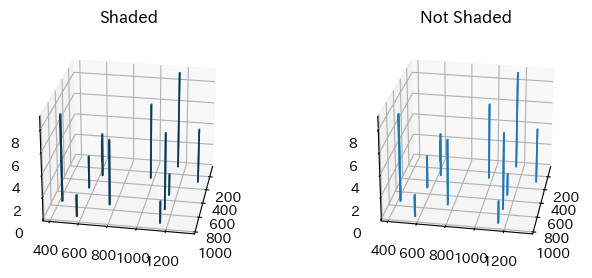

In [10]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# # fake data
# _x = np.random.randint(1, 120, 12)
# _y = np.random.randint(1, 150, 12)
# _xx, _yy = np.meshgrid(_x, _y)
# x, y = _xx.ravel(), _yy.ravel()

x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)

top = z
bottom = np.zeros_like(top)
width = 20
depth = 10

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

ax1.view_init(elev= 25, azim=10, roll=0)
ax2.view_init(elev= 25, azim=10, roll=0)

plt.show()

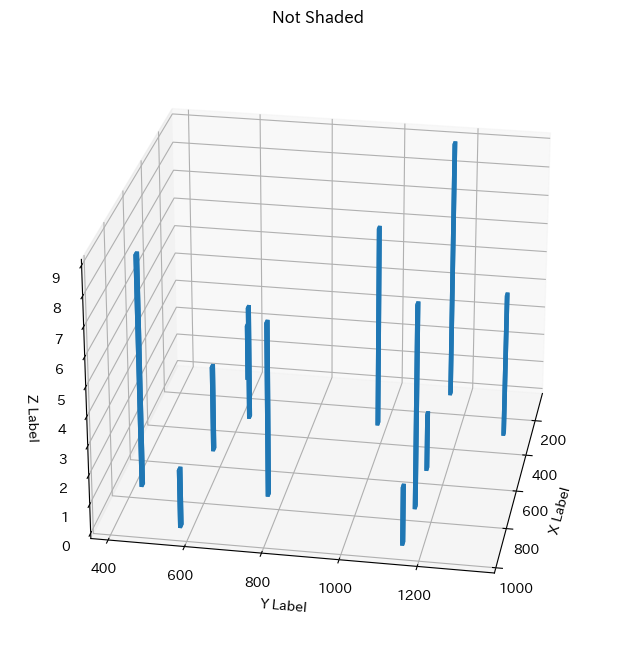

In [11]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)

top = z
bottom = np.zeros_like(top)
width = 20
depth = 10

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')
ax2.view_init(elev= 25, azim=10, roll=0)
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

plt.show()

#### 座標付きネットワークの可視化

In [12]:
rels = []

for i in range(len(arr)):
  rels.append([arr[i]["i1"], arr[i]["i2"]])

{1.0: array([943., 569.], dtype=float32), 2.0: array([749., 421.], dtype=float32), 3.0: array([526., 564.], dtype=float32), 4.0: array([328., 621.], dtype=float32), 5.0: array([101., 569.], dtype=float32), 6.0: array([ 937., 1145.], dtype=float32), 7.0: array([ 747., 1147.], dtype=float32), 8.0: array([ 539., 1145.], dtype=float32), 9.0: array([308., 974.], dtype=float32), 10.0: array([  99., 1143.], dtype=float32), 11.0: array([745., 758.], dtype=float32), 12.0: array([ 310., 1320.], dtype=float32)}


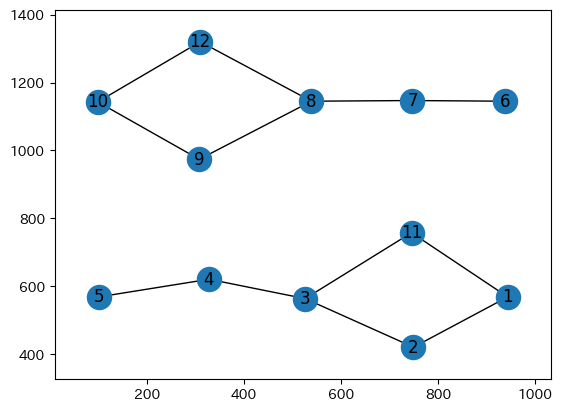

In [13]:
G = nx.Graph()
G.add_edges_from(rels)
pos = {df["id"][i] : np.array([df["x"][i], df["y"][i]], dtype=np.float32) for i in range(len(df))}
print(pos)
# coords = np.array(list(pos.values()))
# print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(111)
nx.draw_networkx(G, pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on
plt.show()

##### 例

{0: array([0.5255459 , 0.31846136], dtype=float32), 1: array([0.57335865, 0.23345299], dtype=float32), 2: array([0.06069659, 0.55433416], dtype=float32), 3: array([0.19607589, 0.46644983], dtype=float32), 4: array([0.57833344, 0.5251192 ], dtype=float32)}
[[0.5255459  0.31846136]
 [0.57335865 0.23345299]
 [0.06069659 0.55433416]
 [0.19607589 0.46644983]
 [0.57833344 0.5251192 ]] <class 'numpy.ndarray'>


C:\Users\so030\AppData\Local\Temp\ipykernel_15524\2596622035.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


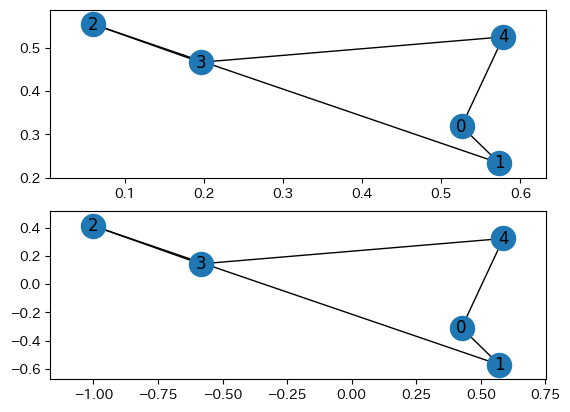

In [14]:
# https://stackoverflow.com/questions/63496724/how-to-use-networkxs-rescale-layout

G = nx.Graph()
G.add_edges_from([[0,1],[1,2],[2,3],[3,4],[4,0]])
pos = nx.random_layout(G)
coords = np.array(list(pos.values()))
# print(type(coords))
print(pos)
print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(211)
nx.draw_networkx(G, pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on

plt.subplot(212)
new_pos = nx.rescale_layout(coords)
nx.draw_networkx(G, new_pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis turn on
plt.show()

## まとめて可視化

{1.0: array([943., 569.], dtype=float32), 2.0: array([749., 421.], dtype=float32), 3.0: array([526., 564.], dtype=float32), 4.0: array([328., 621.], dtype=float32), 5.0: array([101., 569.], dtype=float32), 6.0: array([ 937., 1145.], dtype=float32), 7.0: array([ 747., 1147.], dtype=float32), 8.0: array([ 539., 1145.], dtype=float32), 9.0: array([308., 974.], dtype=float32), 10.0: array([  99., 1143.], dtype=float32), 11.0: array([745., 758.], dtype=float32), 12.0: array([ 310., 1320.], dtype=float32)}


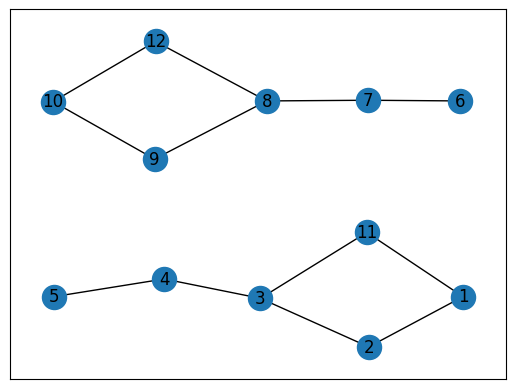

In [15]:
G = nx.Graph()
G.add_edges_from(rels)
pos = {df["id"][i] : np.array([df["x"][i], df["y"][i]], dtype=np.float32) for i in range(len(df))}
print(pos)
# coords = np.array(list(pos.values()))
# print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(111)
nx.draw_networkx(G, pos, with_labels=True)
# plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on
plt.show()

[[ 943.  569.    0.]
 [ 749.  421.    0.]
 [ 526.  564.    0.]
 [ 328.  621.    0.]
 [ 101.  569.    0.]
 [ 937. 1145.    0.]
 [ 747. 1147.    0.]
 [ 539. 1145.    0.]
 [ 308.  974.    0.]
 [  99. 1143.    0.]
 [ 745.  758.    0.]
 [ 310. 1320.    0.]]


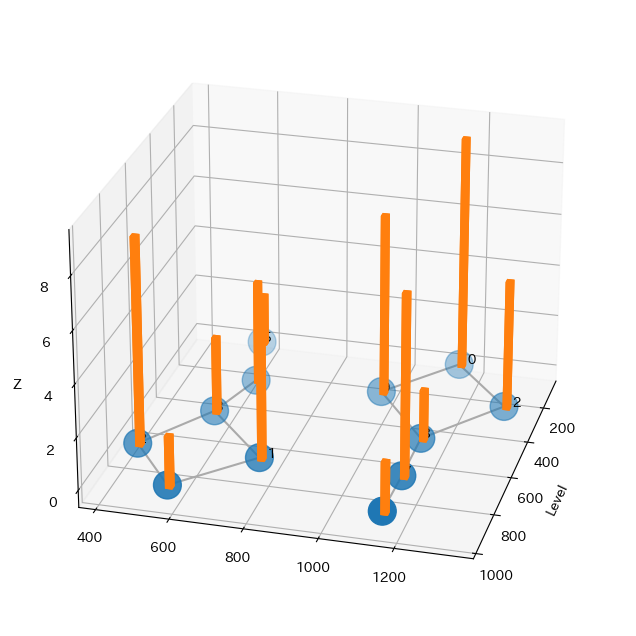

In [16]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

pos = {df["id"][i] : np.array([df["x"][i], df["y"][i], 0], dtype=np.float32) for i in range(len(df))}
# print(pos)
pos_ary = np.array([pos[n] for n in G])
print(pos_ary)

# set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(
    pos_ary[:, 0],
    pos_ary[:, 1],
    pos_ary[:, 2],
    s=400,
)

# ノードにラベルを表示する
for n in G.nodes:
    ax2.text(*pos[n], n)

# エッジの表示
for e in G.edges:
    node0_pos = pos[e[0]]
    node1_pos = pos[e[1]]
    xx = [node0_pos[0], node1_pos[0]]
    yy = [node0_pos[1], node1_pos[1]]
    zz = [node0_pos[2], node1_pos[2]]
    ax2.plot(xx, yy, zz, c="#aaaaaa")

# bar graph code
x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 20
depth = 20
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')
ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('Level')
# ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z')
plt.savefig("try.png")
plt.show()